In [0]:
#Description: This is a python program for finance. 
#             This program will show you how to compute portfolio simple returns, 
#             get daily returns and volatility etc.

#Resources:
# Efficient Frontier => https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f
# How To Be A Successful Investor => https://towardsdatascience.com/how-to-be-a-successful-investor-simple-portfolio-analysis-with-python-7b66fc90fa68
# Financial Python => https://www.quantconnect.com/tutorials/introduction-to-financial-python/rate-of-return,-mean-and-variance
# How To Calculate stock returns in Python => https://www.codingfinance.com/post/2018-04-03-calc-returns-py/
# Log Returns VS Simple Returns => https://fintechprofessor.com/tag/log-returns-vs-simple-returns/
# A Tale Of Two Returns => https://www.portfolioprobe.com/2010/10/04/a-tale-of-two-returns/ 
# Stack Overflow => https://stackoverflow.com/questions/20000726/calculate-daily-returns-with-pandas-dataframe
# Get business days: https://stackoverflow.com/questions/2224742/most-recent-previous-business-day-in-python
# Log Returns for beginners => https://www.coursera.org/lecture/risk-governance-engage-the-board/video-3-2c-log-returns-for-beginners-Jsnqa 
# Why we use log returns in finance => https://www.youtube.com/watch?v=PtoUlt3V0CI 
# Market Lessons: Why we use log returns => http://mktlssns.blogspot.com/2010/04/why-we-use-log-returns.html 
# Magic of log returns => https://investmentcache.com/magic-of-log-returns-concept-part-1/
# An easy mistake with returns => https://www.r-bloggers.com/an-easy-mistake-with-returns/
# Sharp Ratio => https://www.investopedia.com/terms/s/sharperatio.asp
# Simple Calculations to Determine Return on Investments => https://www.thebalance.com/determine-return-on-investment-3140687 
# How Covariance used portfolio theory => https://www.investopedia.com/ask/answers/041315/how-covariance-used-portfolio-theory.asp 

In [0]:
# Import the libraries
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
# Get the stock symbols in your portfolio, 
# I am using FAANG for the portfolio stock
# FAANG is an acronym for the market's five most popular and best-performing tech stocks 
#   (Facebook, Amazon, Apple, Netflix, & Google)
stockSymbols = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [0]:
#Get the stock starting date
stockStartDate = '2013-01-01'

In [48]:
# Get todays date and format it in the form YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')

print(today)

2020-01-28


In [49]:
# Get the number of assests in the portfolio
numAssets = len(stockSymbols)
# Print the number of assests in your portfolio
print('You have '+ str(numAssets)+ ' assets in your portfolio')

You have 5 assets in your portfolio


In [0]:
# Create a function to get the stock price(s) of the portfolio
def getMyPortfolio(stocks= stockSymbols, start = stockStartDate, end = today, col='Adj Close'):
    #data = web.get_data_yahoo(stocks, start = start, end = end)[col]
    data =  web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
    return data

In [51]:
# Get the stock portfolio Adj. Close price and store it into my_stocks variable
my_stocks = getMyPortfolio(stockSymbols)
# Show my stocks
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.850548,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.981491,13.798572,360.483826
2013-01-04,28.760000,259.149994,66.087891,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.699158,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.875954,13.880000,365.280823
...,...,...,...,...,...
2020-01-21,221.440002,1892.000000,316.570007,338.109985,1484.400024
2020-01-22,221.320007,1887.459961,317.700012,326.000000,1485.949951
2020-01-23,219.759995,1884.579956,319.230011,349.600006,1486.650024


In [0]:
# Create a function to visualize the portfolio
def showGraph(stocks= stockSymbols,start=stockStartDate, end=today, col='Adj Close'):
  
  # Create the title 'Portfolio (High,	Low,	Open,	Close,	Volume,	Adj Close) Price History
  title = 'Portfolio ' + col + ' Price History'
  #Get the stocks
  my_stocks = getMyPortfolio(stocks= stocks, start=start, end=end, col = col)
  
  # Visualize the price history
  plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5in 
  # Loop through each stock and plot the Adj Close for each day
  for c in my_stocks.columns.values:
    plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
  
  plt.title(title)
  plt.xlabel('Date',fontsize=18)
  plt.ylabel(col +' Price USD ($)',fontsize=18)
  plt.legend(my_stocks.columns.values, loc='upper left')
  plt.show()


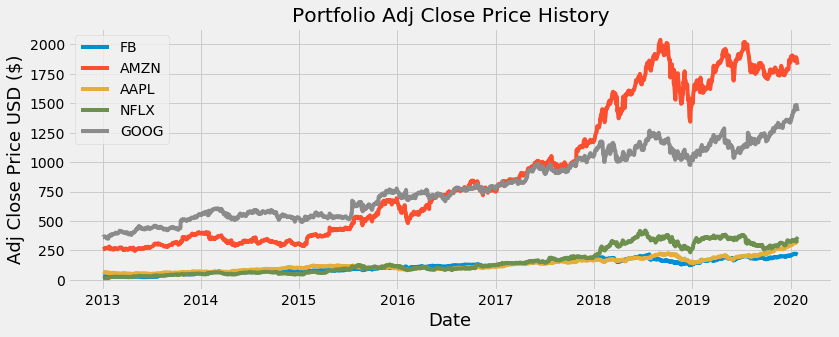

In [53]:
# Show the adjusted close price of FAANG and see how the stocks compare with each other
showGraph(stockSymbols)

In [54]:
# Calculate Simple Returns
daily_simple_returns = my_stocks.pct_change(1) # 1 for ONE DAY lookback for each individual return  NOTE:simple return = new/old - 1
# monthly_simple_returns = my_stocks.pct_change(21) # 21 for ONE MONTH lookback for each individual return
# annual_simple_returns = my_stocks.pct_change(253) # 253 for ONE YEAR lookback for each individual return
# Show the daily simple returns
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2020-01-21,-0.003151,0.014630,-0.006777,-0.004593,0.002709
2020-01-22,-0.000542,-0.002400,0.003570,-0.035817,0.001044
2020-01-23,-0.007049,-0.001526,0.004816,0.072393,0.000471


In [55]:
# Show the stock correlation
# Covariance and correlation are two mathematical concepts which are commonly used in statistics. 
# When comparing data samples from different populations, 
# covariance is used to determine how much two random variables vary together 
# (the directional relationship between two asset prices),
# whereas correlation is used to determine when a change in one variable can result in a change in another.

# A correlation value of 1 means two stocks have a perfect positive correlation. If one stock moves up while the other goes down,
# they would have a perfect negative correlation, noted by a value of -1

# The correlation will always have a measurement value between -1 and 1, and it adds a strength value on how the stocks move together. ... In short, covariance tells you that two variables change 
# the same way while correlation reveals how a change in one variable affects a change in the other.
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.479403,0.343123,0.317199,0.494683
AMZN,0.479403,1.000000,0.376387,0.407968,0.586619
AAPL,0.343123,0.376387,1.000000,0.200673,0.428934
NFLX,0.317199,0.407968,0.200673,1.000000,0.392956
GOOG,0.494683,0.586619,0.428934,0.392956,1.000000


In [56]:
# Show the covariance matrix for simple returns
# Covariance is an important measurement used in modern portfolio theory.
# Modern Portfolio Theory attempts to determine an efficient frontier 
# (The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return.) for a mix of assets in a portfolio. 
# The efficient frontier seeks to optimize the maximum return versus the degree of risk for the overall combined assets 
# in the portfolio.

# Covariance can tell how the stocks move together
# The diagonal entries of the covariance matrix are the variances and the other entries are the covariances
# The covariance of two stocks tells you how likely they are to increase or decrease simultaneously.

# Variance (σ^2) in statistics is a measurement of the spread between numbers in a data set. 
# It measures how far each number in the set is from the mean and therefore from every other number in the set. 
# In finance variance is a measure of dispersion and, most of the time variance is a synonym for risk. 
# The higher the variance of an asset price, the higher risk the asset bears along with a higher return and a higher volatility
# The lower the variance of an asset price, the lower risk the asset bears along with a lower return and a lower volatility

# Variance measures the stocks volatility if you take the square root, e.g. sqrt(variance) = σ = volatility = standard deviation
# NOTE: Volatility is the degree of variation of a trading price series over time as measured by the standard deviation of logarithmic returns.
# Show the covariance matrix for simple returns
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000416,0.000181,0.000110,0.000187,0.000148
AMZN,0.000181,0.000341,0.000109,0.000217,0.000159
AAPL,0.000110,0.000109,0.000246,0.000091,0.000099
NFLX,0.000187,0.000217,0.000091,0.000834,0.000166
GOOG,0.000148,0.000159,0.000099,0.000166,0.000215


In [57]:
# Show the variance
daily_simple_returns.var()

Symbols
FB      0.000416
AMZN    0.000341
AAPL    0.000246
NFLX    0.000834
GOOG    0.000215
dtype: float64

In [58]:
# Print the standard deviation σ (or volatility or sqrt(variance)) for daily simple returns 
print("The Stock Volatility:")
daily_simple_returns.std()

The Stock Volatility:


Symbols
FB      0.020406
AMZN    0.018462
AAPL    0.015698
NFLX    0.028875
GOOG    0.014671
dtype: float64

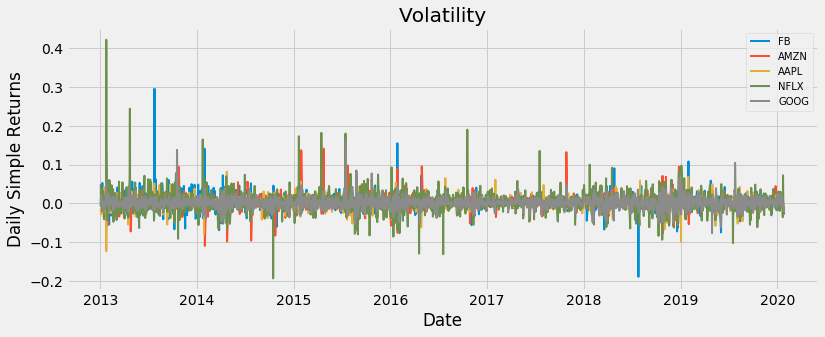

In [59]:
# Visualize the stocks daily simple returns / volatility and see how the stocks compare to each other
plt.figure(figsize=(12,4.5)) #Set the figure size (width, height)

# Loop through each stock and plot the simple returns for each day
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=2, label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)

# Place the legend in the upper left corner with font size of 10
plt.legend(loc='upper right', fontsize=10) 

plt.title('Volatility')
plt.ylabel('Daily Simple Returns') #Label the Y-axis simple returns 
plt.xlabel('Date')
plt.show()

In [60]:
# Show the mean / average of the daily simple return
dailyMeanSimpleReturns = daily_simple_returns.mean() 

# Print the daily mean simple return
print("The daily mean simple return: ")
print(dailyMeanSimpleReturns)

The daily mean simple return: 
Symbols
FB      0.001351
AMZN    0.001273
AAPL    0.000968
NFLX    0.002236
GOOG    0.000884
dtype: float64


In [61]:
# Calculate the expected portfolio daily performance with random weights 
# [0.4, 0.1, 0.3,0.1,0.1] => 40% FB, 10% AMZN, 30% AAPL, 10% NFLX, 10% GOOG
randomWeights = np.array([0.4, 0.1, 0.3,0.1,0.1])
portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns*randomWeights) #NOTE: Be sure to account for rounding of decimal

# Print the daily expected portfolio return
print("The daily expected portfolio return: " +str(portfolioSimpleReturn))

The daily expected portfolio return: 0.0012703252149684886


In [62]:
# Get the yearly simple return, we multiply by 253 instead of 365 because their are approximately 253 trading days in a year
# The NYSE and NASDAQ average about 252 or 253 trading days a year. In 2018 there were 252 trading days in 2020 there will be 253.
# This is from 365.25 (days on average per year) * 5/7 (proportion work days per week) - 6 (weekday holidays) - 3*5/7 (fixed date holidays) = 252.75 ≈ 253. 
# Print the expected annual portfolio simple return
print("Expected annualised portfolio simple return : "+ str(portfolioSimpleReturn * 253))

Expected annualised portfolio simple return : 0.32139227938702764


In [63]:
# Calculate the growth of our investment or in other words,
# calculate the total returns from our investment,to do this we need to calculate the cumulative returns 
# from that investment. 
# The Daily cumulative simple return for n-periods:
#    The simple return from period_1 + 1 times the simple return from period_2 + 1 times ... the simple return from period_n
#    (1+simple_return_1) * (1+simple_return_2) * ... *(1+simple_return_n)
#    Example: (daily_simple_returns["GOOG"][1] + 1) * (daily_simple_returns["GOOG"][2] + 1) = 1.020353
#                    0.000581 * 0.019760 =  1.020353
dailyCumulSimplReturn = (daily_simple_returns+1).cumprod()
# Show the cumulative simple return
dailyCumulSimplReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987378,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959875,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954229,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956796,1.055972,1.013896
...,...,...,...,...,...
2020-01-21,7.908572,7.352998,4.597930,25.722963,4.120191
2020-01-22,7.904286,7.335354,4.614343,24.801651,4.124493
2020-01-23,7.848571,7.324161,4.636565,26.597109,4.126436


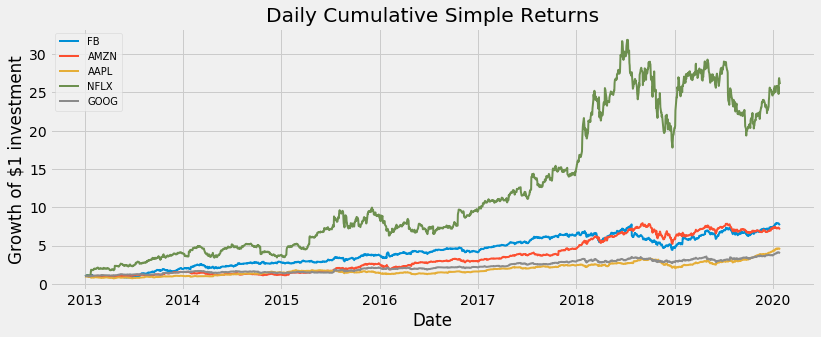

In [64]:
# Visualize the daily cumulative simple returns
fig = plt.figure(figsize=(12.2,4.5))
for c in dailyCumulSimplReturn.columns.values:
  plt.plot(dailyCumulSimplReturn.index, dailyCumulSimplReturn[c], lw=2, label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)

# Place the legend in the upper left corner with font size of 10
plt.legend(loc='upper left', fontsize=10) 
plt.xlabel("Date")
plt.ylabel("Growth of $1 investment")
plt.title("Daily Cumulative Simple Returns")
plt.show()